In [2]:
import pandas as pd 
import numpy as np
import talib as ta
import talib as ta
import pynance as pn
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv('data/yfinance_data/AAPL_historical_data.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [4]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

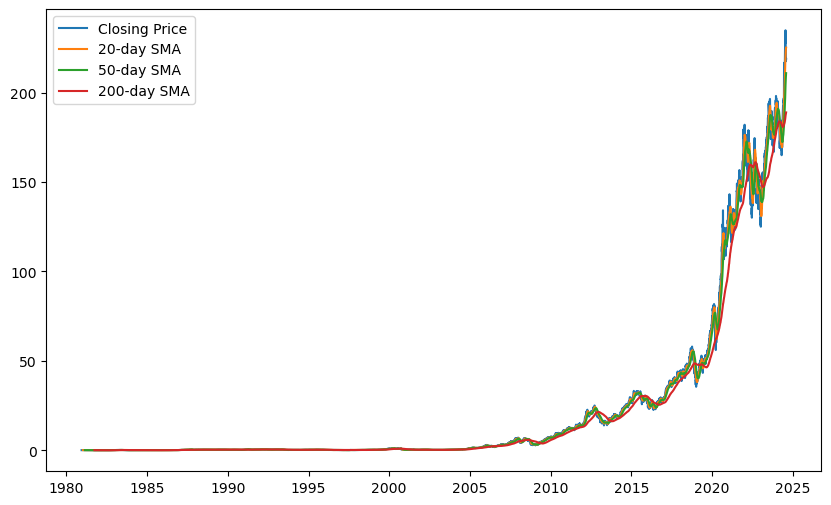

In [5]:


# Calculate different SMAs
sma_20 = ta.SMA(df1['Close'], timeperiod=20)
sma_50 = ta.SMA(df1['Close'], timeperiod=50)
sma_200 = ta.SMA(df1['Close'], timeperiod=200)

# Plotting the SMAs
plt.figure(figsize=(10, 6))
plt.plot(df1['Close'], label='Closing Price')
plt.plot(sma_20, label='20-day SMA')
plt.plot(sma_50, label='50-day SMA')
plt.plot(sma_200, label='200-day SMA')
plt.legend()
plt.show()



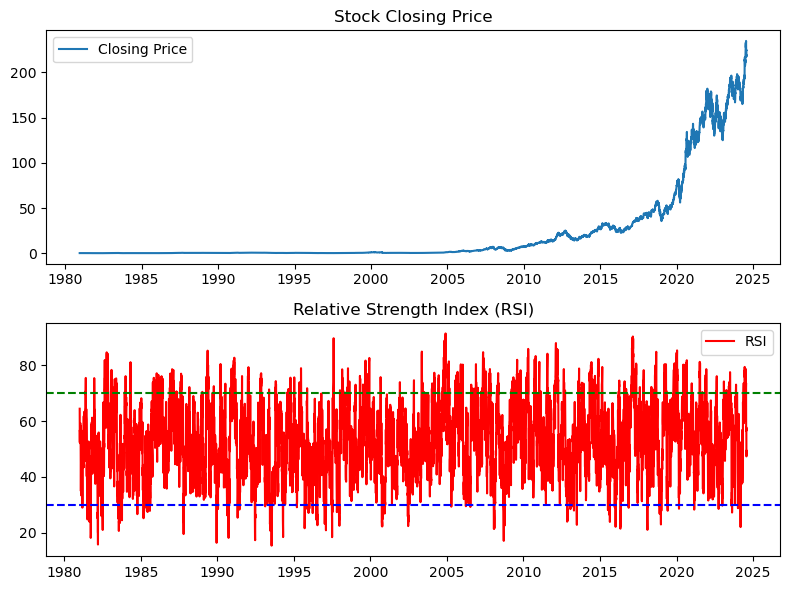

In [6]:
# Calculate RSI with a 14-day period (which is the standard)
df1['RSI'] = ta.RSI(df1['Close'], timeperiod=14)


# Plotting
plt.figure(figsize=(8, 6))

# Subplot 1: Plotting the Closing Price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(df1['Close'], label='Closing Price')
plt.title('Stock Closing Price')
plt.legend()

# Subplot 2: Plotting the RSI
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(df1['RSI'], label='RSI', color='red')
plt.axhline(70, color='green', linestyle='--')  # Overbought line
plt.axhline(30, color='blue', linestyle='--')   # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Calculate MACD
macd, macd_signal, macd_hist = ta.MACD(df1['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [8]:
# Add MACD components to the DataFrame
df1['MACD'] = macd
df1['MACD_Signal'] = macd_signal
df1['MACD_Hist'] = macd_hist


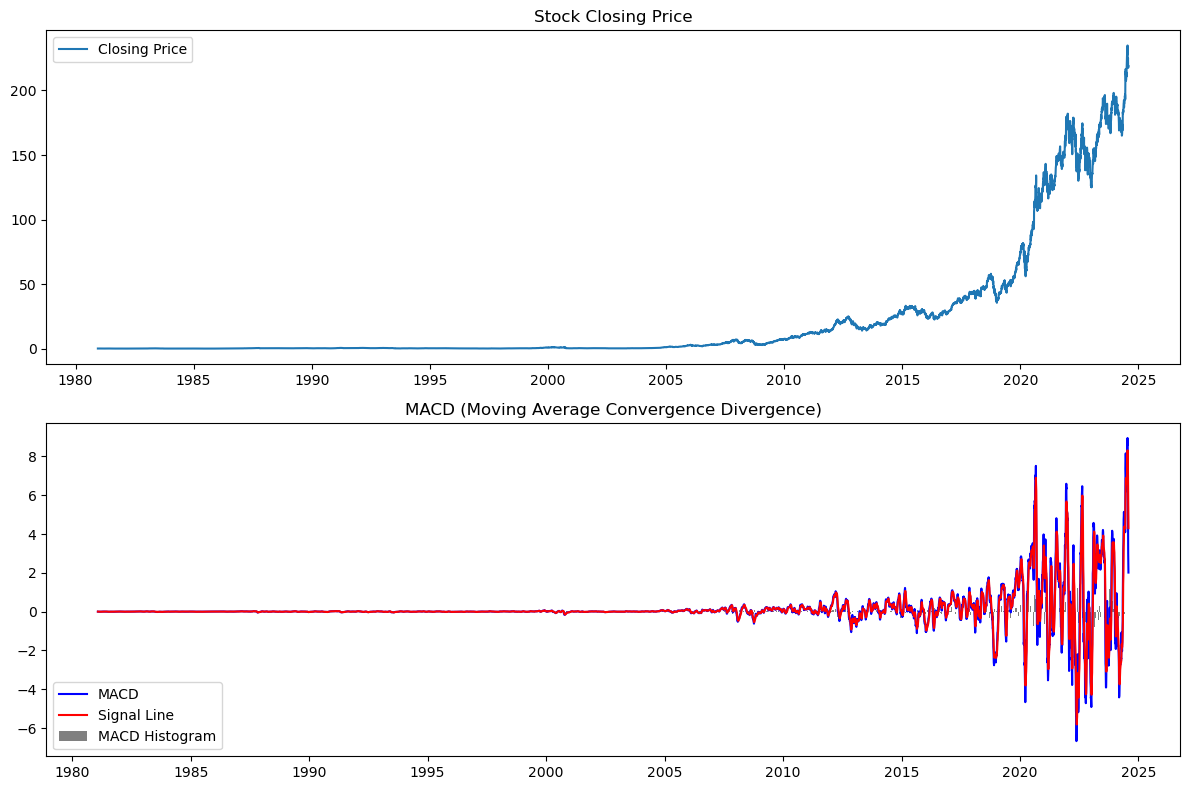

In [9]:
# Plotting
plt.figure(figsize=(12, 8))

# Subplot 1: Plotting the Closing Price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(df1['Close'], label='Closing Price')
plt.title('Stock Closing Price')
plt.legend()

# Subplot 2: Plotting the MACD, Signal line, and Histogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(df1['MACD'], label='MACD', color='blue')
plt.plot(df1['MACD_Signal'], label='Signal Line', color='red')
plt.bar(df1.index, df1['MACD_Hist'], label='MACD Histogram', color='gray')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.legend()

plt.tight_layout()
plt.show()


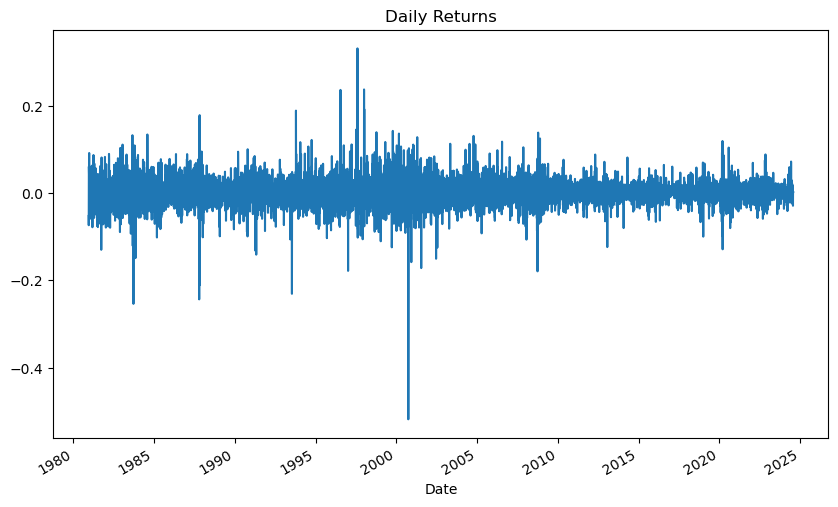

In [12]:
# Calculate daily returns
df1['Daily_Return'] = df1['Close'].pct_change()

# Plot daily returns
df1['Daily_Return'].plot(figsize=(10, 6), title="Daily Returns")
plt.show()


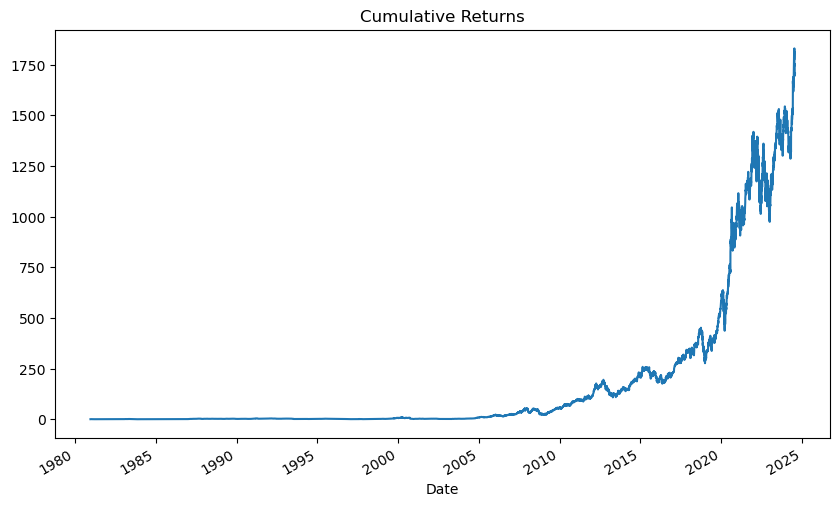

In [13]:
# Calculate cumulative returns
df1['Cumulative_Return'] = (1 + df1['Daily_Return']).cumprod()

# Plot cumulative returns
df1['Cumulative_Return'].plot(figsize=(10, 6), title="Cumulative Returns")
plt.show()


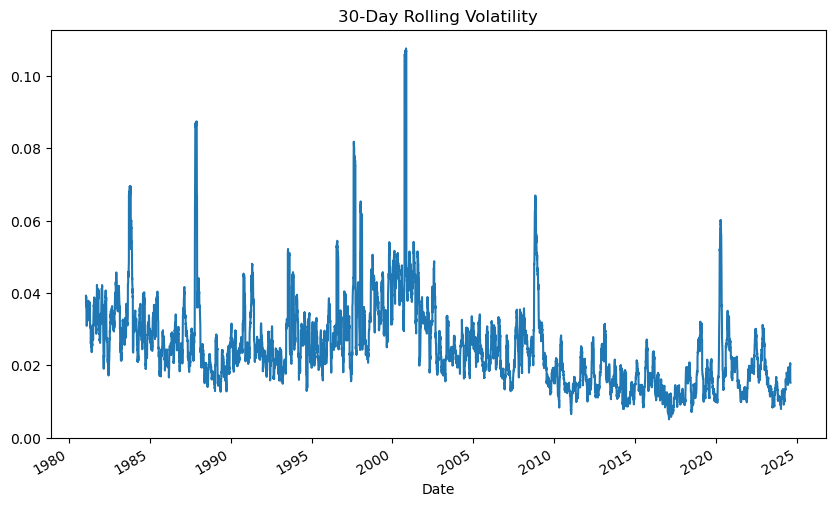

In [16]:

df1['Volatility'] = df1['Daily_Return'].rolling(window=30).std()
df1['Volatility'].plot(figsize=(10, 6), title="30-Day Rolling Volatility")
plt.show()



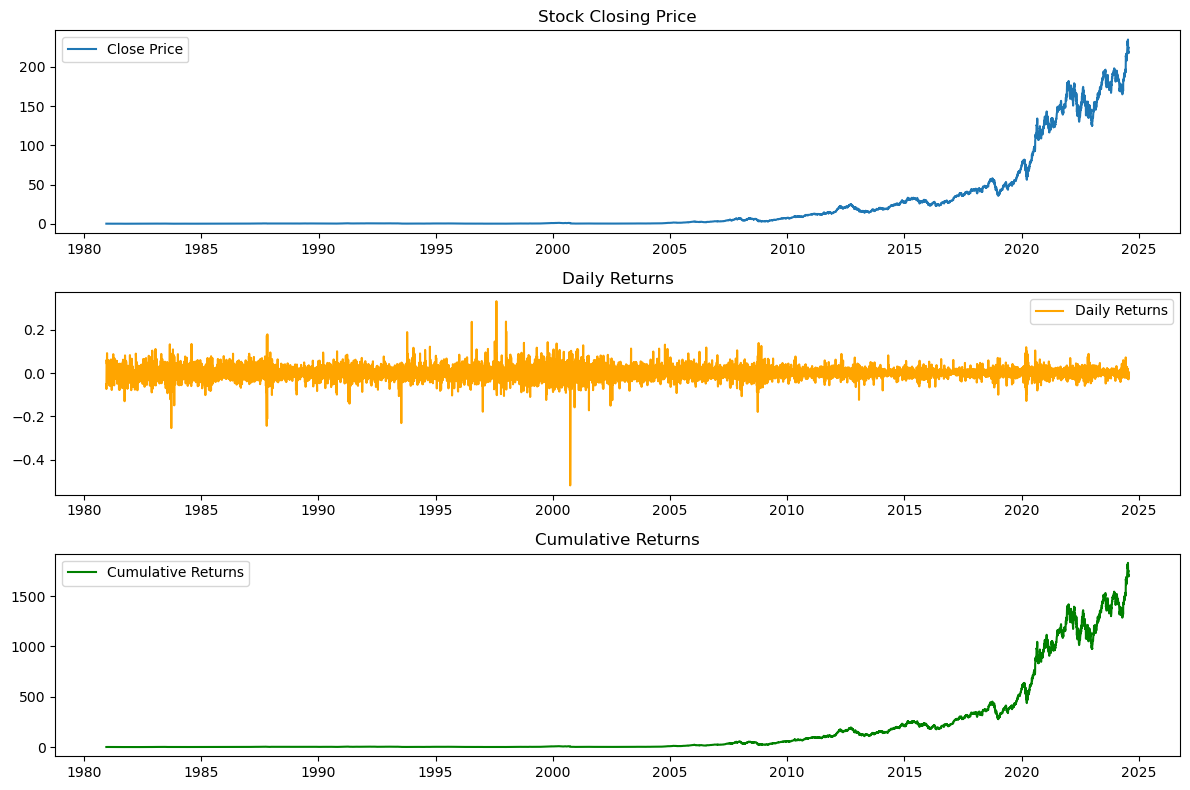

In [17]:
plt.figure(figsize=(12, 8))

# Subplot 1: Plot the stock's closing price
plt.subplot(3, 1, 1)
plt.plot(df1['Close'], label='Close Price')
plt.title('Stock Closing Price')
plt.legend()

# Subplot 2: Plot daily returns
plt.subplot(3, 1, 2)
plt.plot(df1['Daily_Return'], label='Daily Returns', color='orange')
plt.title('Daily Returns')
plt.legend()

# Subplot 3: Plot cumulative returns
plt.subplot(3, 1, 3)
plt.plot(df1['Cumulative_Return'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()
